<b>Problem:</b>
<p>Use the necessary algorithms to improve the galaxy image below:</p>
<img align="left" width="30%" src="images/galaxia.jpg">

<b>Add Required Packages:</b>

In [ ]:
Pkg.add("Images")
Pkg.add("ImageMagick")
Pkg.add("ImageView")
Pkg.add("PyPlot")
kg.add("Gadfly")

Pkg.update()

<b>Execution:</b>

In [23]:
using Images, Colors, FixedPointNumbers, ImageView

#Adquire Raw Matrix from Image
binImage=convert(Image{Gray},load("images/galaxia.jpg"))
grayImage=raw(binImage)

#Convert Image to Gray and then return a Array{Int32} object
imgMatrix = convert(Array{Int32},grayImage)

#Get matrix size
cols,rows=size(imgMatrix)

#Calculate histogram
histogram=zeros(256)

for i=1:rows
    for j=1:cols
        histogram[imgMatrix[j,i]+1]=histogram[imgMatrix[j,i]+1]+1
    end
end

#Equalize histogram
histogram = histogram/(rows*cols)
accum = zeros(256)

accum[1] = histogram[1]

for i=2 : 256
    accum[i] = accum[i-1] + histogram[i]
end

imgNew = zeros(cols, rows)

for i=1:rows
    for j=1:cols
        imgNew[j,i] = accum[imgMatrix[j,i]+1]
    end
end

#Create new image
imgNew = floor(255 * imgNew + 0.5 )

imgMatrixNew = convert(Array{Int32},abs(imgNew))
imgOut = convert(Array{UInt8,2},imgMatrixNew)

print("End...")

End...

<b>Results:</b>

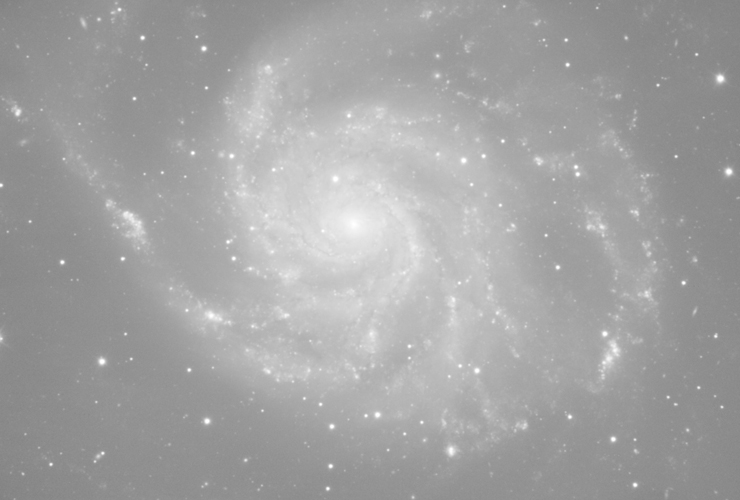

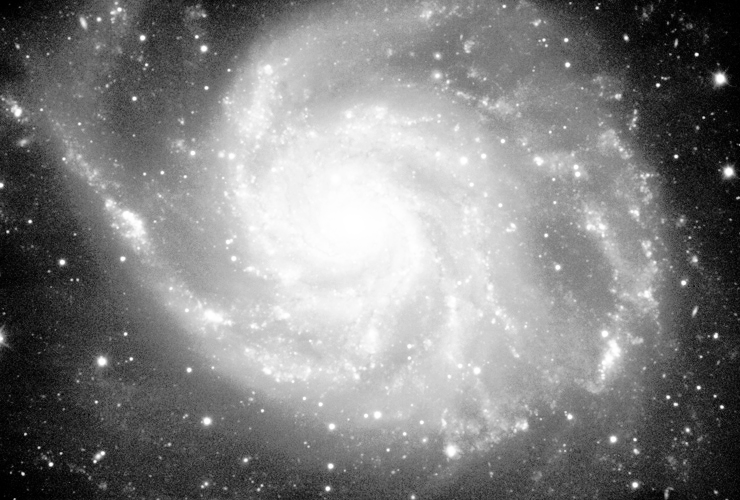

In [22]:
#Original Image: 
display(binImage)

#Equalized Image:
imgOut = grayim(imgOut)
display(imgOut)
